# Planetas

In [60]:
%run "integradores.ipynb"
from pylab import *
from numpy import *
%matplotlib inline

In [13]:
def mov_planeta(x,t):
    r3=(x[0]**2+x[1]**2)**(1.5)
    drx =x[2]
    dry =x[3]
    dvx =- x[0]/r3
    dvy = - x[1]/r3
    return array([drx,dry,dvx,dvy])


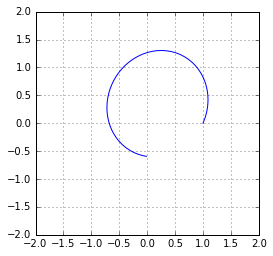

CPU times: user 143 ms, sys: 1.54 ms, total: 144 ms
Wall time: 143 ms


In [52]:
%%time
t , rg =runge(mov_planeta,[1,0,.4,.9],[0,5],.01)
zoom=2
xlim([-zoom, zoom]),ylim([-zoom, zoom])
axes().set_aspect('equal'), grid(True)
plot(r_vr[:,0], r_vr[:,1])
show()

In [20]:
def Jac_mov_planeta(x,t):
    d_ec=array([0,0,0,0])
    r5=(x[0]**2+x[1]**2)**(2.5)
    rxmry=(2*x[0]*x[0]-x[1]*x[1])/r5
    rymrx=(2*x[1]*x[1]-x[0]*x[0])/r5
    rxry=(3*x[0]*x[1])/r5
    Jac= array([[0,0,1,0],[0,0,0,1],[rxmry,rxry,0,0],[rxry,rymrx,0,0]])
    return d_ec, Jac

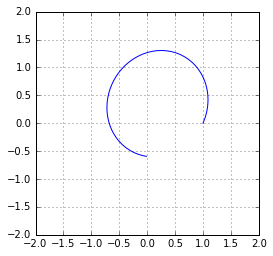

CPU times: user 129 ms, sys: 1 ms, total: 130 ms
Wall time: 129 ms


In [51]:
%%time

t,r_vr=integra2(mov_planeta,Jac_mov_planeta,[1,0,.4,.9],[0,5],0.01)
zoom=2
xlim([-zoom, zoom]),ylim([-zoom, zoom])
axes().set_aspect('equal'), grid(True)
plot(r_vr[:,0], r_vr[:,1])
show()

In [61]:
t , r_vr=rk4(mov_planeta,[1,0,.4,.9],[0,5],0.1)
plot(r_vr[:,0], r_vr[:,1])
show()

TypeError: rk4() takes exactly 3 arguments (4 given)

In [39]:
from scipy.integrate import *

In [46]:
h=0.1
tiempos=arange(0,10+h,h)

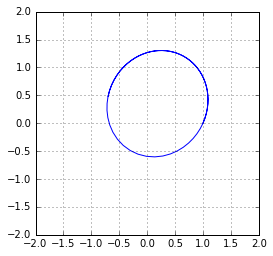

CPU times: user 126 ms, sys: 1.99 ms, total: 128 ms
Wall time: 127 ms


In [48]:
%%time
r_vr=odeint(mov_planeta,[1,0,.4,.9], tiempos)
zoom=2
xlim([-zoom, zoom]),ylim([-zoom, zoom])
axes().set_aspect('equal'), grid(True)
plot(r_vr[:,0], r_vr[:,1])
show()

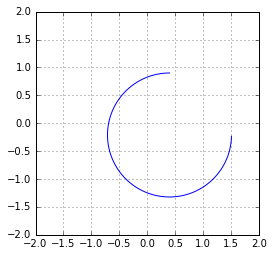

In [53]:
zoom=2
xlim([-zoom, zoom]),ylim([-zoom, zoom])
axes().set_aspect('equal'), grid(True)
plot(r_vr[:,2], r_vr[:,3])
show()